# **Problem Statement:**
Developing a robust data processing framework to extract meaningful features from raw pipeline data, enabling Delhivery’s data science team to build accurate forecasting models.

# **Performing Exploratory Data Analysis**



# **Basic data exploration:**

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181') # Importing Dataset
df.head() # Displaying Top 5 rows

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.iloc[:,10:15] #Displaying the columns that are not displayed in above cell

,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp
0,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55
1,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55
2,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586
3,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57
4,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55
...,...,...,...,...,...
144862,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20
144863,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18
144864,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18
144865,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19


In [3]:
df.shape

(144867, 24)

In [ ]:
df.info()  #Displaying data types and count of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Observation**:
The data set conisist of 24 columns 144867 rows of which 12 are object, 1 bool , 1 interger and 10 float datatypes
The given data set has zero null values

# **Basic Data Cleaning for actual analysis**

Checking for duplicate rows

In [ ]:
print(sum(df.duplicated()))

0


Merging the rows

In [7]:
import pandas as pd
df_merged=df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg({'data':'first','route_type':'first',**{col: 'sum' for col in df.select_dtypes(include='number').columns}}).reset_index()
df_merged


,trip_uuid,source_center,destination_center,data,route_type,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,22680.0,3749,3778.765471,6484.0,3464.0,4540.1261,31.355359,728.0,534.0,670.6205,34.074133
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,20979.0,5060,5082.046634,9198.0,4323.0,6037.6386,45.164741,820.0,474.0,649.8528,44.818471
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,174.0,51,53.310332,96.0,55.0,60.3157,5.239271,46.0,26.0,28.1995,5.387302
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,732.0,183,186.897974,303.0,155.0,209.1151,11.255861,95.0,39.0,55.9899,17.477778
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,10008.0,1689,1725.590250,2601.0,1427.0,1975.7409,20.854778,608.0,231.0,317.7408,27.918923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,248.0,87,88.326510,119.0,106.0,106.7084,4.234812,49.0,42.0,42.1431,4.659615
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,364.0,87,90.049767,173.0,108.0,111.8555,5.936254,89.0,77.0,78.5869,4.935922
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,88.0,21,21.672374,51.0,22.0,25.5371,4.767857,29.0,14.0,16.0184,3.958333
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,574.0,62,62.547507,278.0,59.0,76.5169,8.194678,233.0,42.0,52.5303,10.167059


**Creation of new dataframe with feature extraction**


*   Instead of perfoming actions on original dataframe i am prefering a new dataframe inorder to keep the original dataframe unchanged which can be used as reference in future




In [8]:
df_extract_columns=df.loc[:,['trip_creation_time','source_name','destination_name','trip_uuid','source_center','destination_center','od_start_time','od_end_time']] # extracting the needed additional columns from original dataframe

df_extract_columns[['d.city','d.place','d.code(state)']]=df_extract_columns['destination_name'].str.split('_',n=2,expand=True) # spliting destination_name into city,place,state

df_extract_columns[['s.city','s.place','s.code(state)']]=df_extract_columns['source_name'].str.split('_',n=2,expand=True) #spliting source_name into city,place,state

df_extract_columns['trip_creation_time']=pd.to_datetime(df_extract_columns['trip_creation_time']) # coverting trip_creation_time to datetime format

df_extract_columns['day']=df_extract_columns['trip_creation_time'].dt.day # extracting day

df_extract_columns['month']=df_extract_columns['trip_creation_time'].dt.month # extracting month

df_extract_columns['year']=df_extract_columns['trip_creation_time'].dt.year # extracting year

df_extract_columns['od_start_time']=pd.to_datetime(df_extract_columns['od_start_time']) # converting into date_time format

df_extract_columns['od_end_time']=pd.to_datetime(df_extract_columns['od_end_time']) # converting into date_time format

df_extract_columns['total_trip_time']= round((df_extract_columns['od_end_time'] - df_extract_columns['od_start_time']).dt.total_seconds()/3600,2) # calculating difference between start_time and end_time in hours

df_extract_columns.drop(columns=['source_name','destination_name','trip_creation_time','od_start_time','od_end_time'],inplace=True) # removing the source_name and destination_name
df_Unique_extracted_columns=df_extract_columns.drop_duplicates(subset=['trip_uuid', 'source_center', 'destination_center'],keep='first') #removing duplicate rows
df_Unique_extracted_columns

,trip_uuid,source_center,destination_center,d.city,d.place,d.code(state),s.city,s.place,s.code(state),day,month,year,total_trip_time
0,trip-153741093647649320,IND388121AAA,IND388620AAB,Khambhat,MotvdDPP,D (Gujarat),Anand,VUNagar,DC (Gujarat),20,9,2018,1.44
5,trip-153741093647649320,IND388620AAB,IND388320AAA,Anand,Vaghasi,IP (Gujarat),Khambhat,MotvdDPP,D (Gujarat),20,9,2018,1.82
10,trip-153768492602129387,IND421302AAG,IND411033AAA,Pune,Tathawde,H (Maharashtra),Bhiwandi,Mankoli,HB (Maharashtra),23,9,2018,5.04
15,trip-153693976643699843,IND400011AAA,IND400072AAD,Mumbai,Chndivli,PC (Maharashtra),LowerParel,CP (Maharashtra),None,14,9,2018,1.82
17,trip-153687145942424248,IND562132AAA,IND560099AAB,Bengaluru,Bomsndra,HB (Karnataka),Bangalore,Nelmngla,H (Karnataka),13,9,2018,3.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144834,trip-153799142965708367,IND457226AAA,IND382430AAB,Ahmedabad,East,H_1 (Gujarat),Jaora,RtlamNka,D (Madhya Pradesh),26,9,2018,10.38
144847,trip-153695073416451616,IND400102AAB,IND421302AAG,Bhiwandi,Mankoli,HB (Maharashtra),Mumbai,Jogeshwri,L (Maharashtra),14,9,2018,6.56
144849,trip-153761584139918815,IND421302AAG,IND411033AAA,Pune,Tathawde,H (Maharashtra),Bhiwandi,Mankoli,HB (Maharashtra),22,9,2018,10.24
144854,trip-153718412883843340,IND600056AAB,IND600032AAB,Chennai,Hub (Tamil Nadu),None,MAA,Poonamallee,HB (Tamil Nadu),17,9,2018,1.95


In [9]:
# checking for any duplicate present
print(df_Unique_extracted_columns.duplicated().sum())

0


**Merging the extracted dataframe with merged dataframe**

In [10]:
df_final = df_merged.merge(df_Unique_extracted_columns,
    on=['trip_uuid', 'source_center', 'destination_center'],
    how='left')  # Use 'left' join to keep all rows from df_merged
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       26368 non-null  object 
 1   source_center                   26368 non-null  object 
 2   destination_center              26368 non-null  object 
 3   data                            26368 non-null  object 
 4   route_type                      26368 non-null  object 
 5   start_scan_to_end_scan          26368 non-null  float64
 6   cutoff_factor                   26368 non-null  int64  
 7   actual_distance_to_destination  26368 non-null  float64
 8   actual_time                     26368 non-null  float64
 9   osrm_time                       26368 non-null  float64
 10  osrm_distance                   26368 non-null  float64
 11  factor                          26368 non-null  float64
 12  segment_actual_time             

**Cleaning the dataframe**

In [11]:
df_final_cleaned = df_final.dropna(
    subset=['s.city', 's.place', 's.code(state)'], how='all'
).dropna(
    subset=['d.city', 'd.place', 'd.code(state)'], how='all'
)
df_final_cleaned.info()       # dropping rows where either source city,place and state are null or departure city,place and state are null

<class 'pandas.core.frame.DataFrame'>
Index: 26222 entries, 0 to 26367
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       26222 non-null  object 
 1   source_center                   26222 non-null  object 
 2   destination_center              26222 non-null  object 
 3   data                            26222 non-null  object 
 4   route_type                      26222 non-null  object 
 5   start_scan_to_end_scan          26222 non-null  float64
 6   cutoff_factor                   26222 non-null  int64  
 7   actual_distance_to_destination  26222 non-null  float64
 8   actual_time                     26222 non-null  float64
 9   osrm_time                       26222 non-null  float64
 10  osrm_distance                   26222 non-null  float64
 11  factor                          26222 non-null  float64
 12  segment_actual_time             26222

**Identifying and Handling the missing values**

In [17]:
df_final_cleaned.isnull().sum() # checking for missing values

,0
trip_uuid,0
source_center,0
destination_center,0
data,0
route_type,0
start_scan_to_end_scan,0
cutoff_factor,0
actual_distance_to_destination,0
actual_time,0
osrm_time,0


Conclusion: As there are missing values only in catergorical columns, mode will be used to fill the null values

In [20]:
categorical_columns = df_final_cleaned.select_dtypes(include=['object']).columns
df_final_cleaned[categorical_columns] = df_final_cleaned[categorical_columns].fillna(df_final_cleaned[categorical_columns].mode().iloc[0])

**Checking whether missing values present after filling with mode**

In [21]:
df_final_cleaned.isnull().sum()

,0
trip_uuid,0
source_center,0
destination_center,0
data,0
route_type,0
start_scan_to_end_scan,0
cutoff_factor,0
actual_distance_to_destination,0
actual_time,0
osrm_time,0


**Comparison of the data shape to illustrate the effect of merging**

In [13]:
print(f"Shape before merging: {df.shape}")
print(f"Shape after merging: {df_final_cleaned.shape}")

Shape before merging: (144867, 24)
Shape after merging: (26222, 26)


**Relationships between numerical variables**

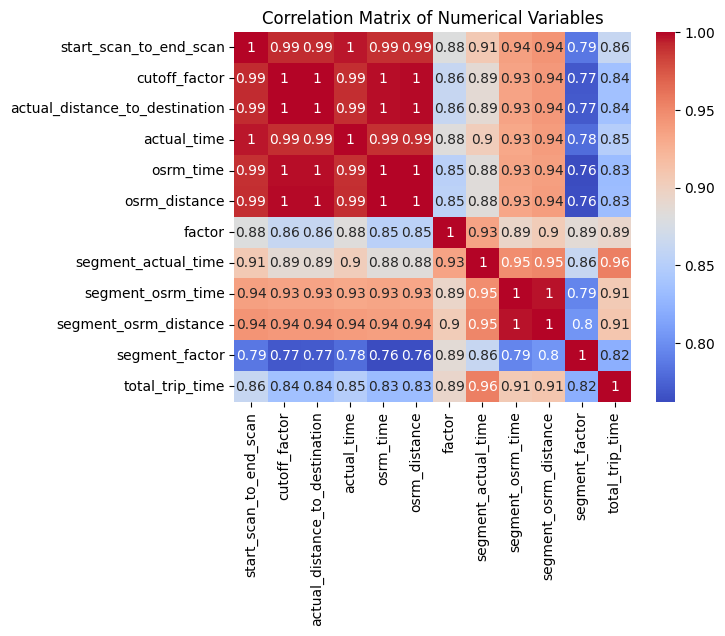

In [12]:
corr_matrix = df_final_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# **Univariant analysis of categorical and numerical columns**



*   **Selected Categorical columns**: trip_uuid, source_center, destination_center,data,route_type,d.city and s.city                     


*   **Selected Numerical Columns**: start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance, segment_actual_time,segment_osrm_time, segment_osrm_distance               
  

*   **Reasons**: Numerical columns such as segment_factor,factor and cut_off_factor are neglected because their purpose is unknown and in city,state and place city is selected in both the cases of source and destination as it has more unique values where it includes state and place




# **Analysis of trip_uuid**

In [ ]:
uni_tripID=df_final_cleaned['trip_uuid'].value_counts().reset_index() #grouping trip_uuid for Total count of trip_uuid
uni_tripID.columns=['trip_uuid','counts']
uni_count=uni_tripID['counts'].value_counts().reset_index()  #Grouping counts to know how many total count of trip_uuid at same frequency
uni_count.columns=['count_frequency','total_trip_uuid']

In [ ]:
unique_id=df_final_cleaned['trip_uuid'].unique()
print(unique_id[:20]) # checking for the format and typo error


['trip-153671041653548748' 'trip-153671042288605164'
 'trip-153671043369099517' 'trip-153671046011330457'
 'trip-153671052974046625' 'trip-153671055416136166'
 'trip-153671066201138152' 'trip-153671066826362165'
 'trip-153671074033284934' 'trip-153671079956500691'
 'trip-153671090980523004' 'trip-153671110078355292'
 'trip-153671117375890592' 'trip-153671121411074590'
 'trip-153671122262300031' 'trip-153671127071609610'
 'trip-153671128962918389' 'trip-153671143043841452'
 'trip-153671173668736946' 'trip-153671174968648046']


Text(0.5, 1.0, 'Total Trip UUID Per each Frequency ')

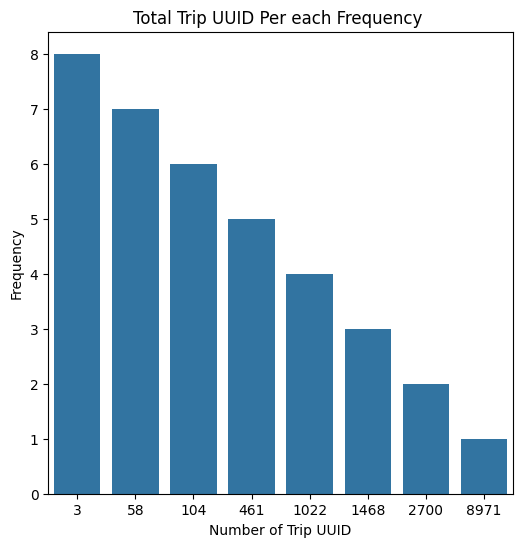

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6)) # Generating graph of size 10X6
sns.barplot(x='total_trip_uuid',y='count_frequency',data=uni_count) # plotting bar plot
plt.xlabel('Number of Trip UUID') #Naming X-axis
plt.ylabel('Frequency') #Naming X-axis
plt.title('Total Trip UUID Per each Frequency ') #Setting Title

Interpretation:


*   There are only 3 trip_uuid occuring 8 times.
*   60% of trip_uuid occuring only once where as 35% of trip_uuid occuring 2-4 times and 3% of trip_uuid are occuring 5 times and rest of each frequency is occuring under 1% of trip_uuid



# **Analysis of Source_center**

Text(0, 0.5, 'Frequency')

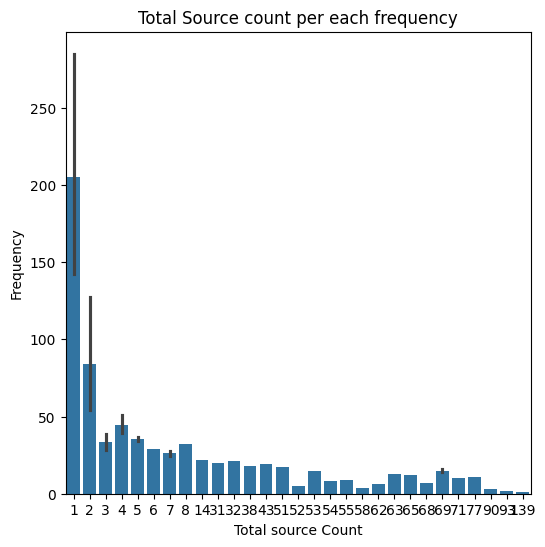

In [ ]:
df_source_center=df_final['source_center'].value_counts().reset_index() #finding the count of each source_center
df_source_center.columns=['source_center','count_of_source_center'] #changing the columns name
df_source_counts=df_source_center['count_of_source_center'].value_counts().reset_index() #findind the total source_center per each count
df_source_counts.columns=['frequency','total_source_center_per_each_frequency'] #changing the columns name
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.barplot(x='total_source_center_per_each_frequency',y='frequency',data=df_source_counts)
plt.title('Total Source count per each frequency') #setting title
plt.xlabel("Total source Count") #Naming x-axis
plt.ylabel('Frequency') #Naming Y-axis

**Interpretation**:


1.   There's a clear inverse relationship between the "Total Source Count" and the "frequency."  As the "Total Source Count" increases, the frequency decreases. This means that there are more sources with average frequency around 20
2.   The highest frequency occurs when the "Total Source Count" is 1.  This indicates that a large number of items or events have only one source associated with them.
3.   The frequency drops sharply as the "Total Source Count" increases from 1 to 2, and then continues to decline, although at a slower rate. This suggests a distribution where having a single source is very typical, but having multiple sources becomes increasingly rare.



# **Analysis of Destination_center**

Text(0, 0.5, 'Frequency')

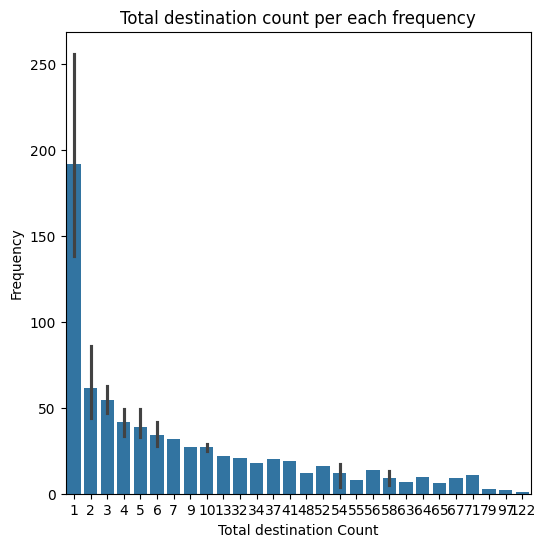

In [ ]:
df_destination_center=df_final_cleaned['destination_center'].value_counts().reset_index() #finding the count of each Destination_center
df_destination_center.columns=['destination_center','count_of_destination_center'] #changing the columns name
df_destination_counts=df_destination_center['count_of_destination_center'].value_counts().reset_index() #find the total Destination_center per each count
df_destination_counts.columns=['frequency','total_destination_center'] #changing the columns name
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.barplot(x='total_destination_center',y='frequency',data=df_destination_counts)
plt.title('Total destination count per each frequency') # Setting title
plt.xlabel("Total destination Count") #Naming x-axis
plt.ylabel("Frequency") #Naming Y-axis

**Interpretation:**
Similar with source count plot


# **Analysis of Data**

Text(0, 0.5, 'Count')

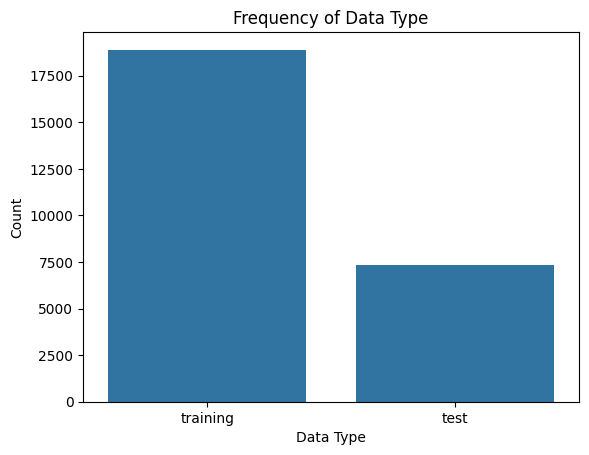

In [ ]:
df_data=df_final_cleaned['data'].value_counts().reset_index() # Grouping Data for total count of unique data types
sns.countplot(data=df_final_cleaned,x='data')
plt.title('Frequency of Data Type') #Setting Title
plt.xlabel('Data Type') # Naming X-axis
plt.ylabel('Count') #Naming Y-axis


**Interpretation:**


*   From the plot its evident that training data is more than test data




# **Analysis of Route Type**

Text(0.5, 0, 'Route Type')

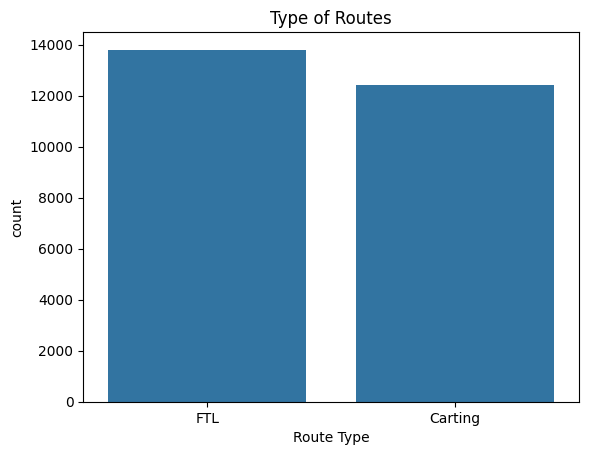

In [ ]:
df_final_cleaned['route_type'].value_counts() # Grouping Data for total count of unique data types
sns.countplot(data=df_final_cleaned,x='route_type')
plt.title('Type of Routes') # Setting Title
plt.xlabel('Route Type') # Naming x-axis

**Interpretation:**


*   from the plot it's evident that count is almost same so there is no bias in the distribution of type of data




# **Analysis of start_scan_to_end_scan**

Text(0, 0.5, 'Frequency')

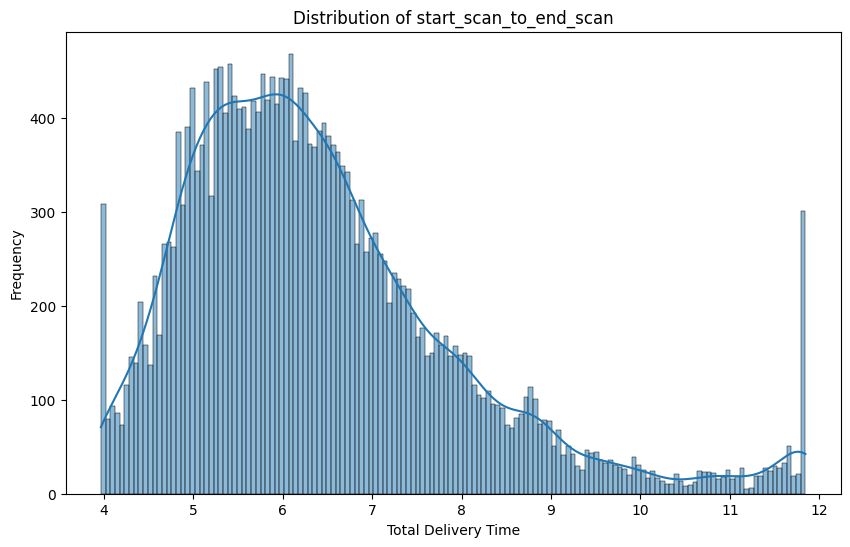

In [40]:
import numpy as np
plt.figure(figsize=(10,6)) #For Plotting the graph of size 10X6
sns.histplot(data=np.log1p(df_final_cleaned['start_scan_to_end_scan']),bins=150,kde=True) # log distribution
plt.title('Distribution of start_scan_to_end_scan') # Title name
plt.xlabel('Total Delivery Time') # x-axis name
plt.ylabel('Frequency') #Y-axis name


**Interpretation:**


*    The distribution in this histogram suggests that there are two distinct patterns or groups within the "start_scan_to_end_scan" data, requiring further investigation to understand the underlying causes and potentially optimize the process.




**Outliers Calculation:**

In [ ]:
import numpy as np
q1=np.percentile(df_final_cleaned['start_scan_to_end_scan'],25) #Calculating first quartile
q3=np.percentile(df_final_cleaned['start_scan_to_end_scan'],75) #Calculating Third quartile
iqr=q3-q1 #calculating irq range
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_final_cleaned[(df_final_cleaned['start_scan_to_end_scan'] < lower_bound) | (df_final_cleaned['start_scan_to_end_scan'] > upper_bound)]['start_scan_to_end_scan']
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in start_scan_to_end_scan is {Number_of_outliers}")

Number of outliers in start_scan_to_end_scan is 3698


**Handling Outliers**

In [31]:
def capping_outliers(data,lower_percentile=1,upper_percentile=99):
    lower_limit=np.percentile(data,lower_percentile)
    upper_limit=np.percentile(data,upper_percentile)
    return np.clip(data,lower_limit,upper_limit)
df_final_cleaned['start_scan_to_end_scan'] = capping_outliers(df_final_cleaned['start_scan_to_end_scan'])

# **Analysis of actual_distance_to_destination**

Text(0, 0.5, 'Frequency')

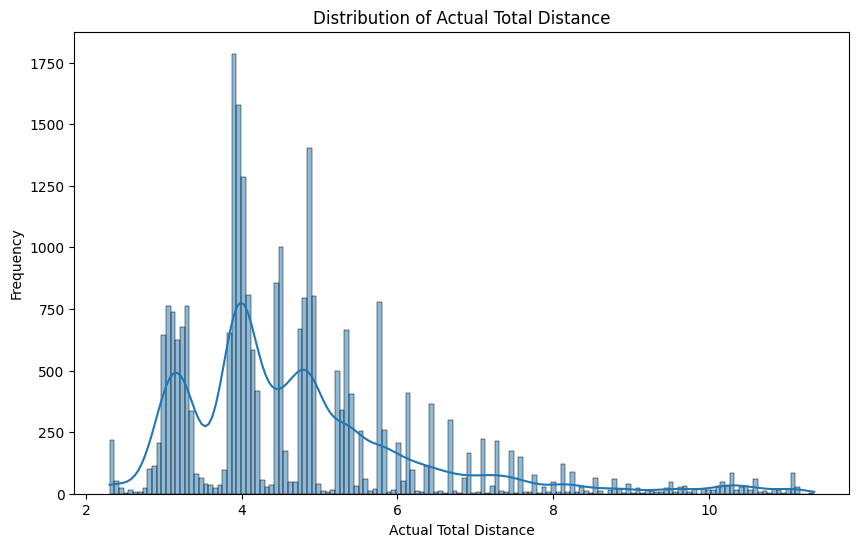

In [ ]:
plt.figure(figsize=(10,6)) #For Plotting the graph of size 10X6
sns.histplot(data=np.log1p(df_final_cleaned['actual_distance_to_destination']),bins=150,kde=True) # log distribution
plt.title('Distribution of Actual Total Distance') # Title name
plt.xlabel('Actual Total Distance') # x-axis name
plt.ylabel('Frequency') #Y-axis name

**Outlier Calculation for actual_distance_to_destination**

In [34]:
import numpy as np
q1=np.percentile(df_final_cleaned['actual_distance_to_destination'],25) #Calculating first quartile
q3=np.percentile(df_final_cleaned['actual_distance_to_destination'],75) #Calculating Third quartile
iqr=q3-q1 #calculating irq range
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_final_cleaned[(df_final_cleaned['actual_distance_to_destination'] < lower_bound) | (df_final_cleaned['actual_distance_to_destination'] > upper_bound)]['actual_distance_to_destination']
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in actual_distance_to_destination is {Number_of_outliers}")
#Handling outliers
df_final_cleaned['actual_distance_to_destination'] = capping_outliers(df_final_cleaned['actual_distance_to_destination'])


Number of outliers in actual_distance_to_destination is 3904


Interpretation:


*    The distribution in this histogram suggests that there are several distinct patterns or groups within the "Actual Total Distance" data, requiring further investigation to understand the underlying causes and potentially optimize the delivery process. The dominant distance ranges are around 3 and 4, and the presence of a tail towards higher distances suggests the existence of outliers or unusual deliveries.



# **Analysis of actual_time**

Text(0, 0.5, 'Frequency')

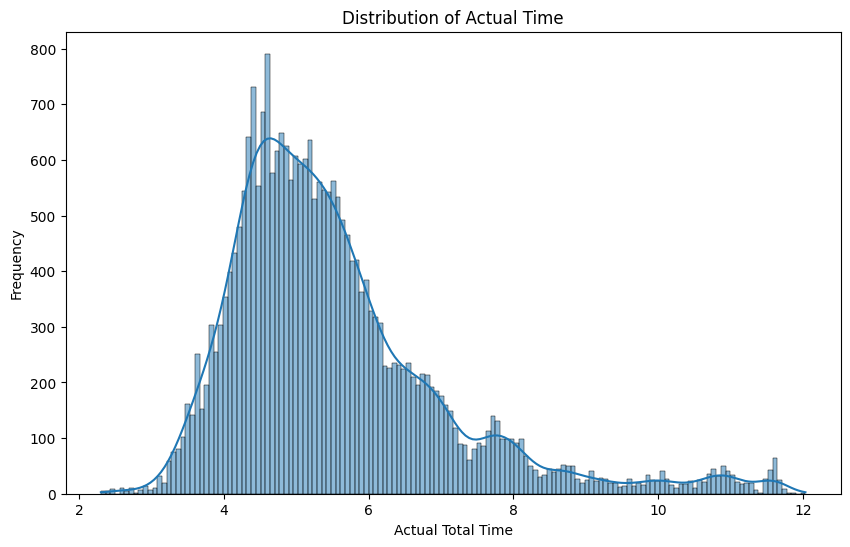

In [ ]:

plt.figure(figsize=(10,6)) #For Plotting the graph of size 10X6
sns.histplot(data=np.log1p(df_final_cleaned['actual_time']),bins=150,kde=True) # log distribution
plt.title('Distribution of Actual Time') # Title name
plt.xlabel('Actual Total Time') # x-axis name
plt.ylabel('Frequency') #Y-axis name

**Outliers Calculation for actual_time**

In [35]:
import numpy as np
q1=np.percentile(df_final_cleaned['actual_time'],25) #Calculating first quartile
q3=np.percentile(df_final_cleaned['actual_time'],75) #Calculating Third quartile
iqr=q3-q1 #calculating irq range
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_final_cleaned[(df_final_cleaned['actual_time'] < lower_bound) | (df_final_cleaned['actual_time'] > upper_bound)]['actual_time']
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in actual_time is {Number_of_outliers}")
#Handling outliers
df_final_cleaned['actual_time'] = capping_outliers(df_final_cleaned['actual_time'])

Number of outliers in actual_time is 3797


**Interpretation:**


*   The distribution in this histogram suggests that while most deliveries have a relatively short "Actual Total Time" (around 4.5), there are factors that can lead to significantly longer times, requiring further investigation to understand and potentially optimize the delivery process.






**Analysis of osrm_distance**

Text(0, 0.5, 'Frequency')

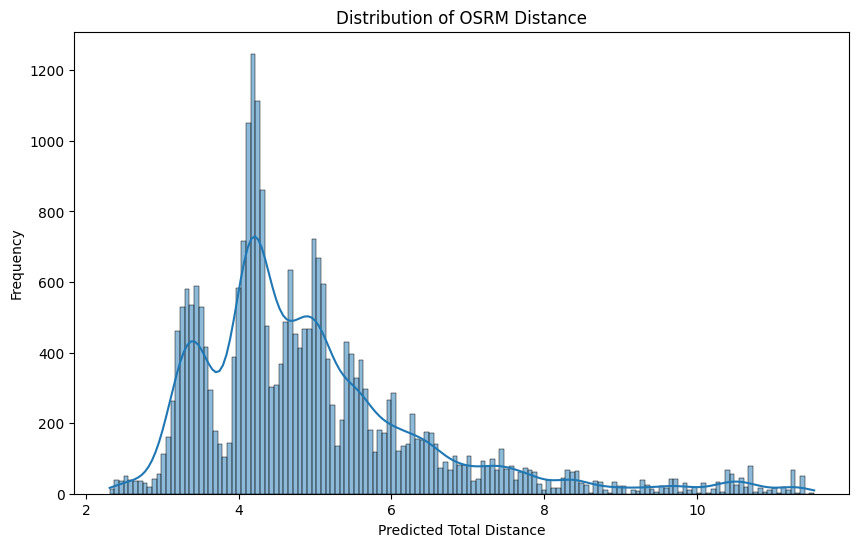

In [ ]:
plt.figure(figsize=(10,6)) #For Plotting the graph of size 10X6
sns.histplot(data=np.log1p(df_final_cleaned['osrm_distance']),bins=150,kde=True) # log distribution
plt.title('Distribution of OSRM Distance') # Title name
plt.xlabel('Predicted Total Distance') # x-axis name
plt.ylabel('Frequency') #Y-axis name

**Outliers Calculation for osrm_distance**

In [39]:
import numpy as np
q1=np.percentile(df_final_cleaned['osrm_distance'],25) #Calculating first quartile
q3=np.percentile(df_final_cleaned['osrm_distance'],75) #Calculating Third quartile
iqr=q3-q1 #calculating irq range
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_final_cleaned[(df_final_cleaned['osrm_distance'] < lower_bound) | (df_final_cleaned['osrm_distance'] > upper_bound)]['osrm_distance']
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in osrm_distance is {Number_of_outliers}")
#Handling outliers
df_final_cleaned['osrm_distance'] = capping_outliers(df_final_cleaned['osrm_distance'])

Number of outliers in osrm_distance is 3867


**Interpretation:**


*   The distribution in this histogram suggests that there are several distinct patterns or groups within the "OSRM Distance" data, requiring further investigation to understand the underlying causes and potentially optimize the route planning process. The dominant distance ranges are around 3.5 and 4.5, and the presence of a tail towards higher distances suggests the existence of outliers or unusual route predictions.






# **Analysis of osrm_time**

Text(0, 0.5, 'Frequency')

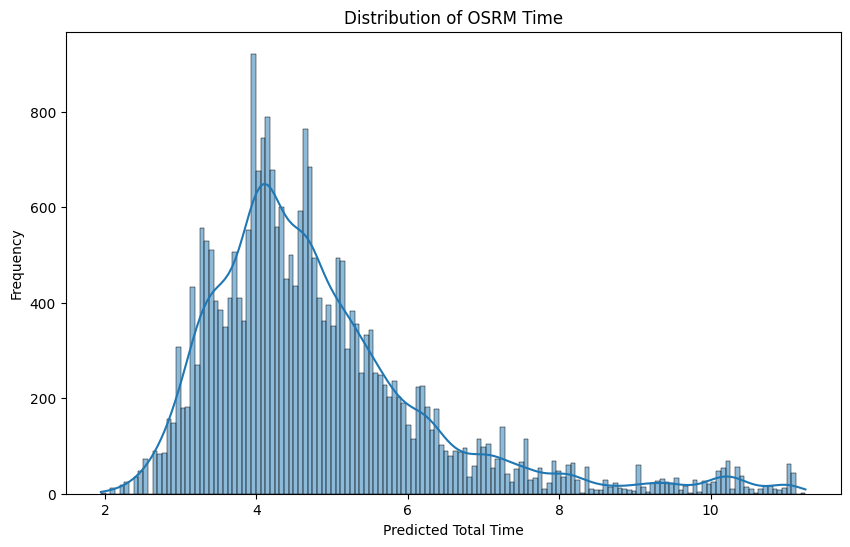

In [ ]:


plt.figure(figsize=(10,6)) #For Plotting the graph of size 10X6
sns.histplot(data=np.log1p(df_final_cleaned['osrm_time']),bins=150,kde=True) # log distribution
plt.title('Distribution of OSRM Time') # Title name
plt.xlabel('Predicted Total Time') # x-axis name
plt.ylabel('Frequency') #Y-axis name

**Outliers Calculation for osrm_time**

In [38]:
import numpy as np
q1=np.percentile(df_final_cleaned['osrm_time'],25) #Calculating first quartile
q3=np.percentile(df_final_cleaned['osrm_time'],75) #Calculating Third quartile
iqr=q3-q1 #calculating irq range
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_final_cleaned[(df_final_cleaned['osrm_time'] < lower_bound) | (df_final_cleaned['osrm_time'] > upper_bound)]['osrm_time']
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in osrm_time is {Number_of_outliers}")
#Handling outliers
df_final_cleaned['osrm_time'] = capping_outliers(df_final_cleaned['osrm_time'])

Number of outliers in osrm_time is 3696


**Interpretation:**


*   The distribution in this histogram suggests that while most routes have a relatively short predicted time (around 4), there are factors that can lead to significantly longer predicted times, requiring further investigation to understand and potentially optimize route planning or OSRM's predictions.


**Analysis of segment_actual_time**

Text(0, 0.5, 'Frequency')

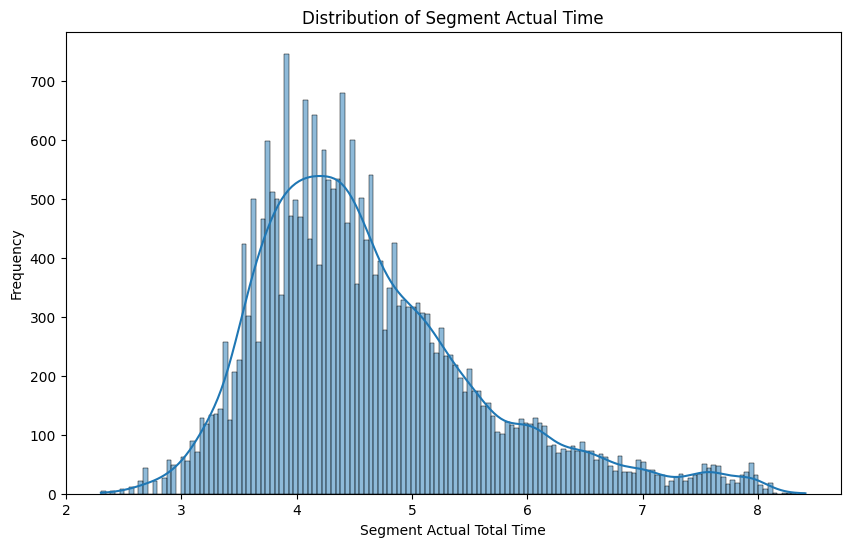

In [ ]:

plt.figure(figsize=(10,6)) #For Plotting the graph of size 10X6
sns.histplot(data=np.log1p(df_final_cleaned['segment_actual_time']),bins=150,kde=True) # log distribution
plt.title('Distribution of Segment Actual Time') # Title name
plt.xlabel('Segment Actual Total Time') # x-axis name
plt.ylabel('Frequency') #Y-axis name

**Outliers Calculation for segment_actual_time**

In [ ]:
import numpy as np
q1=np.percentile(df_final_cleaned['segment_actual_time'],25) #Calculating first quartile
q3=np.percentile(df_final_cleaned['segment_actual_time'],75) #Calculating Third quartile
iqr=q3-q1 #calculating irq range
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_final_cleaned[(df_final_cleaned['segment_actual_time'] < lower_bound) | (df_final_cleaned['segment_actual_time'] > upper_bound)]['segment_actual_time']
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in segment_actual_time is {Number_of_outliers}")
#Handling outliers
df_final_cleaned['segment_actual_time'] = capping_outliers(df_final_cleaned['segment_actual_time'])

Number of outliers in segment_actual_time is 3142


**Interpretation:**


*    The Distribution in this histogram suggests that while most segments have a relatively short actual time (around 4), there are factors that can lead to significantly longer times, requiring further investigation to understand and potentially optimize the segment completion process.


# Analysis of segment_osrm_time

Text(0, 0.5, 'Frequency')

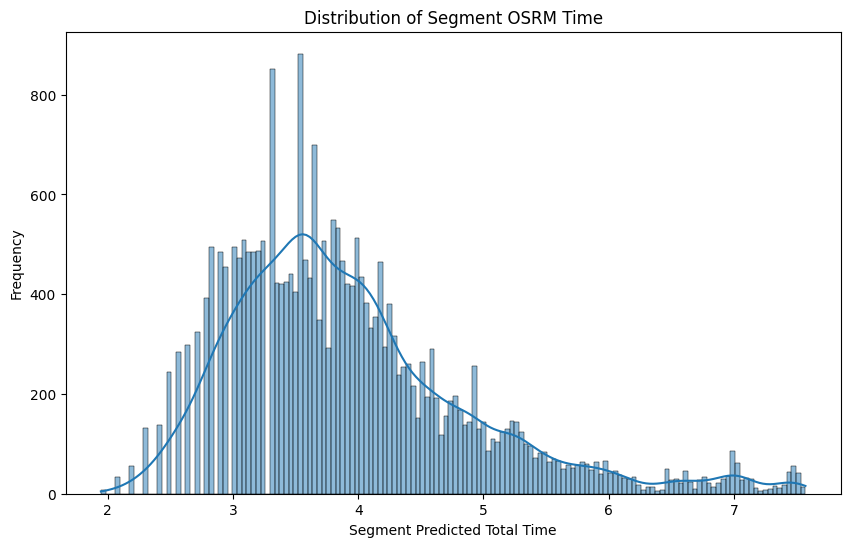

In [ ]:

plt.figure(figsize=(10,6)) #For Plotting the graph of size 10X6
sns.histplot(data=np.log1p(df_final_cleaned['segment_osrm_time']),bins=150,kde=True) # log distribution
plt.title('Distribution of Segment OSRM Time') # Title name
plt.xlabel('Segment Predicted Total Time') # x-axis name
plt.ylabel('Frequency') #Y-axis name

Outliers Calculation for segment_osrm_time

In [37]:
import numpy as np
q1=np.percentile(df_final_cleaned['segment_osrm_time'],25) #Calculating first quartile
q3=np.percentile(df_final_cleaned['segment_osrm_time'],75) #Calculating Third quartile
iqr=q3-q1 #calculating irq range
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_final_cleaned[(df_final_cleaned['segment_osrm_time'] < lower_bound) | (df_final_cleaned['segment_osrm_time'] > upper_bound)]['segment_osrm_time']
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in segment_osrm_time is {Number_of_outliers}")
#Handling outliers
df_final_cleaned['segment_osrm_time'] = capping_outliers(df_final_cleaned['segment_osrm_time'])

Number of outliers in segment_osrm_time is 3138


**Interpretation:**


*   The distribution in this histogram suggests that while most segments have a relatively short predicted time (around 3.5), there are factors that can lead to significantly longer predicted times, requiring further investigation to understand and potentially optimize route planning or OSRM's predictions for segments.



# **Analysis of segment_osrm_distance**

Text(0, 0.5, 'Frequency')

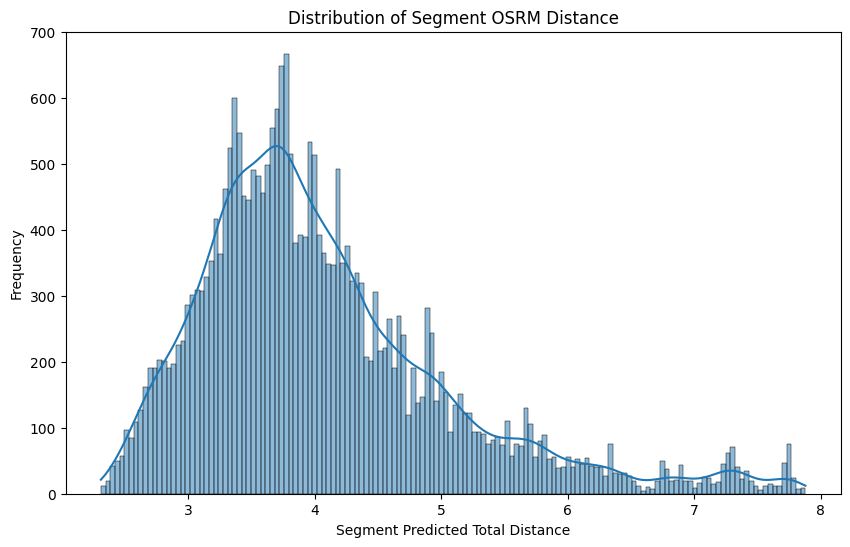

In [ ]:

plt.figure(figsize=(10,6)) #For Plotting the graph of size 10X6
sns.histplot(data=np.log1p(df_final_cleaned['segment_osrm_distance']),bins=150,kde=True) # log distribution
plt.title('Distribution of Segment OSRM Distance') # Title name
plt.xlabel('Segment Predicted Total Distance') # x-axis name
plt.ylabel('Frequency') #Y-axis name

**Outliers Calculation for segment_osrm_distance**

In [36]:
import numpy as np
q1=np.percentile(df_final_cleaned['segment_osrm_distance'],25) #Calculating first quartile
q3=np.percentile(df_final_cleaned['segment_osrm_distance'],75) #Calculating Third quartile
iqr=q3-q1 #calculating irq range
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_final_cleaned[(df_final_cleaned['segment_osrm_distance'] < lower_bound) | (df_final_cleaned['segment_osrm_distance'] > upper_bound)]['segment_osrm_distance']
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in segment_osrm_distance is {Number_of_outliers}")
#Handling outliers
df_final_cleaned['segment_osrm_distance'] = capping_outliers(df_final_cleaned['segment_osrm_distance'])

Number of outliers in segment_osrm_distance is 3095


**Interpretation:**


*   The distribution in this histogram suggests that while most segments have a relatively short predicted distance (around 3.8), there are factors that can lead to significantly longer predicted distances, requiring further investigation to understand and potentially optimize route planning or OSRM's predictions for segments.



# **Analysis of Departure city**

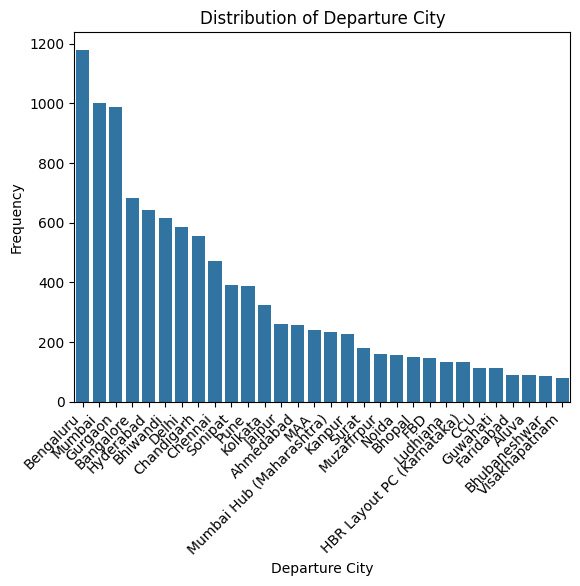

In [ ]:
df_departure=df_final_cleaned['d.city'].value_counts().reset_index()
df_departure_sorted=df_departure.sort_values(by='count',ascending=False).head(30) # Extracting top 30 cities
df_departure_sorted
sns.barplot(data=df_departure_sorted,x='d.city',y='count')
plt.title('Distribution of Departure City')
plt.ylabel('Frequency')
plt.xlabel('Departure City')
plt.xticks(rotation=45, ha='right')
plt.show()

Interpretation:


*   The bar plot reveals that the destination of parcels is highly concentrated in major metropolitan areas, with Bengaluru being the most common destination. The long-tail distribution indicates that a few cities dominate the parcel traffic, while many other cities have relatively low volumes. This information can be valuable for logistics planning, resource allocation, and market analysis.




# **Analysis of Source City**

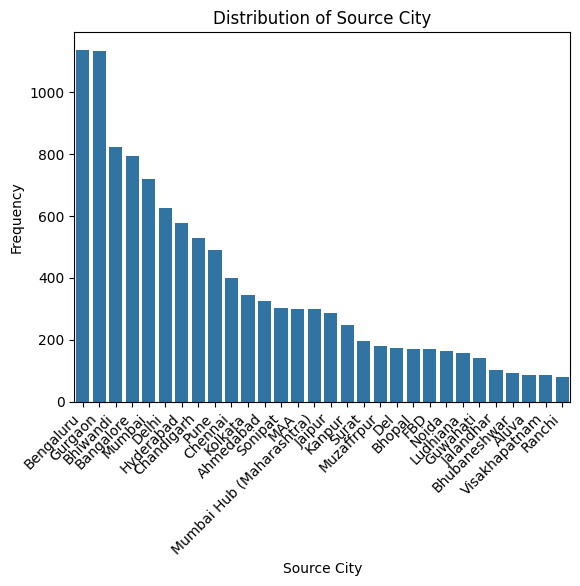

In [ ]:
df_source=df_final_cleaned['s.city'].value_counts().reset_index()
df_source_sorted=df_source.sort_values(by='count',ascending=False).head(30) # Extracting top 30 cities
sns.barplot(data=df_source_sorted,x='s.city',y='count')
plt.title('Distribution of Source City')
plt.ylabel('Frequency')
plt.xlabel('Source City')
plt.xticks(rotation=45, ha='right')
plt.show()

**Interpretation:**


*   The bar plot reveals that the origination of parcels is highly concentrated in major metropolitan areas, with Bengaluru and Gurgaon being the most common source cities. The long-tail distribution indicates that a few cities dominate the parcel traffic, while many other cities have relatively low volumes. This information can be valuable for logistics planning, resource allocation, and market analysis.




# **Bi-Variant Analysis of categorical and numerical columns**


Selected Numerical-Numerical Columns:


1.   Actual_time aggregated value and OSRM time aggregated value
2.   Actual_time aggregated value and Segment actual time aggregated value
3.   Osrm distance aggregated value and Segment osrm distance aggregated value
4.   Osrm time aggregated value and Segment osrm time aggregated value

Selected Catergorical-Numerical Columns:


1.   Point a(	source_center ) and start_scan_to_end_scan


Selection Criteria: The above 5 combinations are selected logically they are siginificantly effecting the delivery efficiency


# **Actual_time aggregated value VS OSRM time aggregated value**

**Visual Analysis:**

Text(0, 0.5, 'Calculated Time')

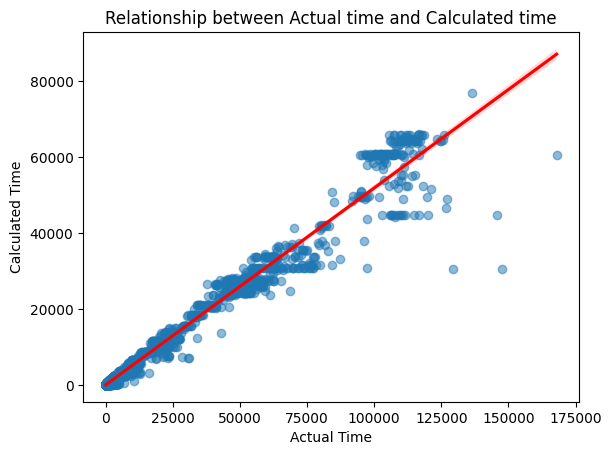

In [15]:
# Reg plot is used as the graph involves two numerical columns
sns.regplot(data=df_final_cleaned, x='actual_time', y='osrm_time', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Relationship between Actual time and Calculated time') # Setting Title for the graph
plt.xlabel('Actual Time') # Setting Name for x-axis
plt.ylabel('Calculated Time') # Setting Name for y-axis

**Calculation and visualization of the percentage difference between actual and predicted times**

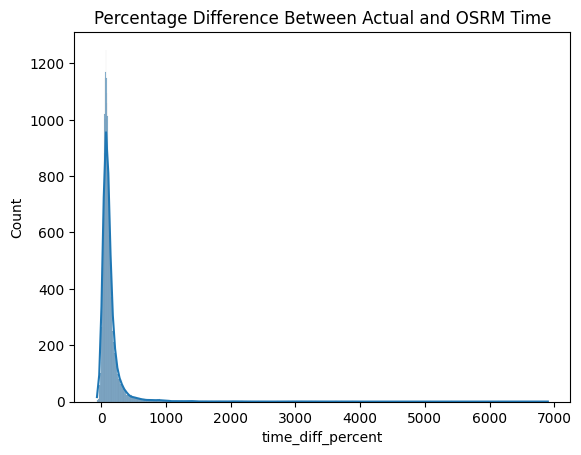

In [16]:
df_final_cleaned['time_diff_percent'] = (df_final_cleaned['actual_time'] - df_final_cleaned['osrm_time']) / df_final_cleaned['osrm_time'] * 100
sns.histplot(data=df_final_cleaned, x='time_diff_percent', kde=True)
plt.title('Percentage Difference Between Actual and OSRM Time')
plt.show()

**Interpretation:**


*   The scatter plot shows a strong positive linear relationship between "Actual Time" and "Calculated Time", suggesting that the calculated time is a good predictor of the actual time. However, there are some deviations and potential outliers that should be investigated.



# **Hypothesis Testing of Actual Time vs ORSM Time**


**Paired T_Test**: As we need to compare the mean value of both actual time and ORSM time for the same delivery, it's evident that they are related, hence paired t_test is appropriate

**Assumptions**:


1.   **Data is Paired and Dependent**: As both times are for same delivery they are paired and dependent
      
     
2.   **Differences should be Normally Distributed**: Need to test using Kolmogorov-Smirnov(K-S) Test as sample size is greater than 5000
3.   **No Outliers in Differences:** Need to test using IQR method
4.   **Continuous Data**: As both the samples are values of time so they are continuos
5.   **Variance** is Not Needed in a Paired t-test because paired t-test works on differences between paired values, not the raw values of each sample


**Testing Normality using K-S test**


*   Null Hypothesis: Distribution is normal
*   Alternate Hypothesis: Distribution is not normal

*   Siginificance level: 5%






**Testing Normality for Actual_Time and ORSM_Time**

In [41]:
from scipy.stats import kstest
significance_level=0.05
actual_time_standardized=(df_final_cleaned['actual_time'] - df_final_cleaned['actual_time'].mean())/df_final_cleaned['actual_time'].std() # actual_time Standarization
osrm_time_standardized=(df_final_cleaned['osrm_time'] - df_final_cleaned['osrm_time'].mean())/df_final_cleaned['osrm_time'].std() # osrm_time Standarization

ks_stats_actual,ks_pvalue_actual=kstest(actual_time_standardized,'norm') # Testing for Actual Time
print(f'Test statistic of Actual Time= {ks_stats_actual}')
print(f'P_Value of Actual Time= {ks_pvalue_actual}')
if ks_pvalue_actual<significance_level:
  print("Conclusion: Distribution is not normal")
else:
  print("Conclusion: Distribution is normal")
print('\n')
ks_stats_orsm,ks_pvalue_orsm=kstest(osrm_time_standardized,'norm') # Testing for ORSM Time
print(f'Test statistic of ORSM Time= {ks_stats_orsm}')
print(f'P_Value of ORSM Time= {ks_pvalue_orsm}')
if ks_pvalue_orsm<significance_level:
  print("Conclusion: Distribution is not normal")
else:
  print("Conclusion: Distribution is normal")


Test statistic of Actual Time= 0.4145881902800515
P_Value of Actual Time= 0.0
Conclusion: Distribution is not normal


Test statistic of ORSM Time= 0.4222589309891058
P_Value of ORSM Time= 0.0
Conclusion: Distribution is not normal


**Finding Outliers in difference using IQR Method**

In [42]:
df_ao=df_final_cleaned['actual_time']-df_final_cleaned['osrm_time']
q1=np.percentile(df_ao,0.25)
q3=np.percentile(df_ao,0.75)
iqr_actual=q3-q1
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_ao[(df_ao< lower_bound) | (df_ao> upper_bound)]
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in segment_osrm_distance is {Number_of_outliers}")


Number of outliers in segment_osrm_distance is 5941


**Conclusion:**
As data is not normal concluded from k-s test and there are outliers in differences concluded from IQR method, paired t-test is not appropriate as assumptions are failed

**Alternative**:Wilcoxon Signed-Rank Test a Non-Parametric test alternative to paired t_test

**Reasons:**

*   Does not require normality (works for skewed data)

*   Handles outliers better than a paired t-test

*   Used when comparing two related (dependent) samples.

**Hypothesis for Wilcoxon Signed-Rank Test:**

*   Null Hypothesis: No significant difference
*   Alternative Hypothesis: significant difference between Actual Time & ORSM Time.



*   Significane level= 5%
  








**Performing Wilcoxon Signed-Rank Test on Actual Time vs ORSM Time**

In [43]:
from scipy.stats import wilcoxon # importing wilcoxon
significance_level=0.05
stat_ao,pvalue_ao=wilcoxon(df_final_cleaned['actual_time'],df_final_cleaned['osrm_time']) # performing test
print(f'Test statistic of actual and orsm time= {stat_ao}') # finding test statistic value
print(f'P_Value of actual and orsm time= {pvalue_ao}') # finding p_value
if pvalue_ao<significance_level: # finding conclusion
  print("Conclusion: Significant difference between Actual Time & ORSM Time")
else:
  print("Conclusion: No Significant difference between Actual Time & ORSM Time")


Test statistic of actual and orsm time= 1708469.5
P_Value of actual and orsm time= 0.0
Conclusion: Significant difference between Actual Time & ORSM Time


# **Actual_time aggregated value and Segment actual time aggregated value**

**Visual Analysis:**

Text(0, 0.5, 'Actual Time taken by the subset')

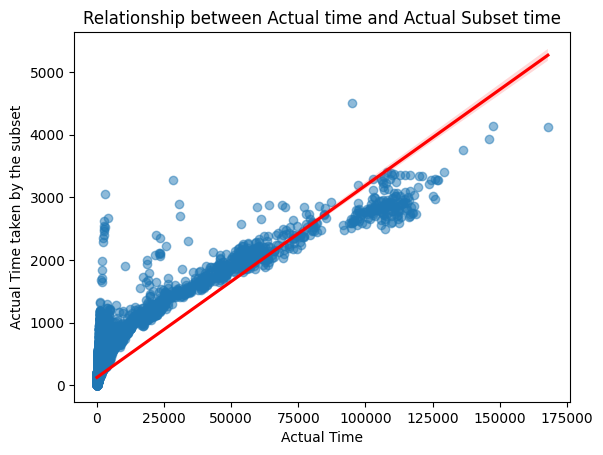

In [22]:
# Regression plot is used as the graph involves two numerical columns
sns.regplot(data=df_final_cleaned,x='actual_time',y='segment_actual_time',scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Relationship between Actual time and Actual Subset time') # Setting Title for the graph
plt.xlabel('Actual Time') # Setting Name for x-axis
plt.ylabel('Actual Time taken by the subset') # Setting Name for y-axis

**Interpretation:**
The scatter plot shows a positive non-linear relationship between "Actual Time" and "Time taken by the subset". The subset time tends to increase as the actual time increases, but the relationship is not linear. There are some potential outliers that should be investigated.

# **Hypothesis Testing of Actual Time vs Segment actual Time**


*   similarly with the actual time vs orsm time, paired t-test is performed and assumptions of paired t-test are checked before performing the test




**Testing Normality of Actual time and Segment actual time**

*   As the normality test for actual time is already performed previously which is not a normal distribution, therefore only checking for the normality of segment actual time




**Normality Test for segment actual time using K-S Test**

In [44]:
from scipy.stats import kstest
significance_level=0.05
segment_actual_time_standardized=(df_final_cleaned['segment_actual_time'] - df_final_cleaned['segment_actual_time'].mean())/df_final_cleaned['segment_actual_time'].std() # segment_actual_time Standarization
ks_stats_segment,ks_pvalue_segment=kstest(segment_actual_time_standardized,'norm') # Testing for Actual Time
print(f'Test statistic of segment actual time= {ks_stats_segment}')
print(f'P_Value of Segment Actual Time= {ks_pvalue_segment}')
if ks_pvalue_segment<significance_level:
  print("Conclusion: Distribution is not normal")
else:
  print("Conclusion: Distribution is normal")

Test statistic of segment actual time= 0.31219919736916385
P_Value of Segment Actual Time= 0.0
Conclusion: Distribution is not normal


**Find Outliers in difference of actual and segment actual time using IQR method**

In [45]:
df_as=df_final_cleaned['actual_time']-df_final_cleaned['segment_actual_time']
q1=np.percentile(df_ao,0.25)
q3=np.percentile(df_ao,0.75)
iqr_actual=q3-q1
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_as[(df_as< lower_bound) | (df_as> upper_bound)]
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in actual and segment_actual_time is {Number_of_outliers}")

Number of outliers in actual and segment_actual_time is 6604


**Conclusion**: Similar reasons with previous test, Therefore Wilcoxon Signed-Rank Test will be performed

**Hypothesis for Wilcoxon Signed-Rank Test**:



*   Null Hypothesis: No significant difference between Actual Time & Segment actual Time
*   Alternative Hypothesis: significant difference between Actual Time & Segment actual Time

*   Significane level= 5%


**Performing Wilcoxon Signed-Rank Test on Actual Time vs Segment actual Time**

In [46]:
from scipy.stats import wilcoxon # importing wilcoxon
significance_level=0.05
stat_as,pvalue_as=wilcoxon(df_final_cleaned['actual_time'],df_final_cleaned['segment_actual_time']) # performing Wilcoxon
print(f'Test statistic of actual and segment actual time= {stat_as}') # test statistic value
print(f'P_Value of actual and segment actual time= {pvalue_as}') # p-value
if pvalue_as<significance_level: # conclusion
  print("Conclusion: Significant difference between Actual Time & Segment actual Time")
else:
  print("Conclusion: No Significant difference between Actual Time & Segment actual Time")

Test statistic of actual and segment actual time= 0.0
P_Value of actual and segment actual time= 0.0
Conclusion: Significant difference between Actual Time & Segment actual Time


# **Osrm distance aggregated value and Segment osrm distance aggregated value**

**Visual Analysis:**

Text(0, 0.5, 'Calculated Distance of Subset')

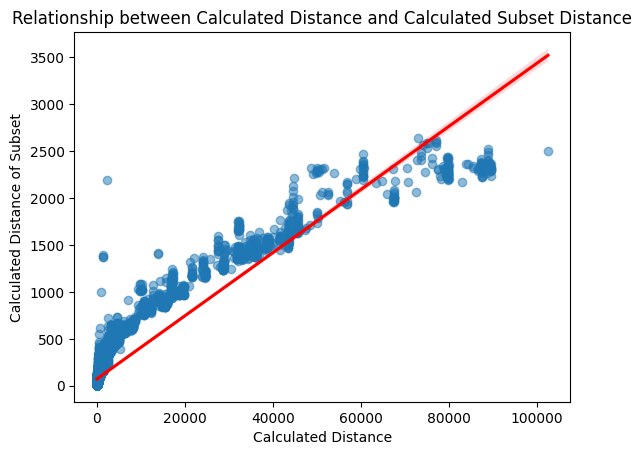

In [23]:
# Regression plot is used as the graph involves two numerical columns
sns.regplot(data=df_final_cleaned,x='osrm_distance',y='segment_osrm_distance',scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Relationship between Calculated Distance and Calculated Subset Distance') # Setting Title for the graph
plt.xlabel('Calculated Distance') # Setting Name for x-axis
plt.ylabel('Calculated Distance of Subset') # Setting Name for y-axis

**Interpretation:**
The scatter plot shows a strong positive non-linear relationship between "Actual Distance" and "Distance Covered by the subset". The subset distance tends to increase as the actual distance increases, but the relationship is not linear. There are some potential outliers that should be investigated.

# **Hypothesis Testing of OSRM Distance vs Segment OSRM Distance:**
similarly with previous test, paired t-test is performed and assumptions of paired t-test are checked before performing the test

**Testing Normality of OSRM Distance and Segment OSRM Distance**

In [47]:
from scipy.stats import kstest # Importing KS-test
significance_level=0.05
osrm_distance_standardized=(df_final_cleaned['osrm_distance'] - df_final_cleaned['osrm_distance'].mean())/df_final_cleaned['osrm_distance'].std() # osrm_distance Standarization
segment_osrm_distance_standardized=(df_final_cleaned['segment_osrm_distance'] - df_final_cleaned['segment_osrm_distance'].mean())/df_final_cleaned['segment_osrm_distance'].std() # segment_osrm_distance Standarization

ks_stats_od,ks_pvalue_od=kstest(osrm_distance_standardized,'norm') # Testing for ORSM Distance
print(f'Test statistic of OSRM Distance= {ks_stats_od}')
print(f'P_Value of OSRM Distance= {ks_pvalue_od}')
if ks_pvalue_od<significance_level:
  print("Conclusion: Distribution is not normal")
else:
  print("Conclusion: Distribution is normal")
print('\n')
ks_stats_sod,ks_pvalue_sod=kstest(segment_osrm_distance_standardized,'norm') # Testing for Segment ORSM Distance
print(f'Test statistic of Segment ORSM Distance= {ks_stats_sod}')
print(f'P_Value of Segment ORSM Distance= {ks_pvalue_sod}')
if ks_pvalue_sod<significance_level:
  print("Conclusion: Distribution is not normal")
else:
  print("Conclusion: Distribution is normal")

Test statistic of OSRM Distance= 0.4241612027435977
P_Value of OSRM Distance= 0.0
Conclusion: Distribution is not normal


Test statistic of Segment ORSM Distance= 0.33279494306921786
P_Value of Segment ORSM Distance= 0.0
Conclusion: Distribution is not normal


**Find Outliers in difference of OSRM Distance and Segment ORSM Distance using IQR method**

In [48]:
df_osd=df_final_cleaned['osrm_distance']-df_final_cleaned['segment_osrm_distance']
q1=np.percentile(df_osd,0.25)
q3=np.percentile(df_osd,0.75)
iqr_actual=q3-q1
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_osd[(df_osd< lower_bound) | (df_osd> upper_bound)]
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in osrm and segment_osrm_distance is {Number_of_outliers}")

Number of outliers in osrm and segment_osrm_distance is 4442


**Conclusion**: Similar reasons with previous test, Therefore Wilcoxon Signed-Rank Test will be performed

**Hypothesis for Wilcoxon Signed-Rank Test**:



*   Null Hypothesis: No significant difference between OSRM Distance & Segment OSRM Distance
*   Alternative Hypothesis: significant difference between OSRM Distance & Segment OSRM Distance

*   Significane level= 5%


**Performing Wilcoxon Signed-Rank Test on OSRM Distance vs Segment OSRM Distance**

In [49]:
from scipy.stats import wilcoxon # importing wilcoxon
significance_level=0.05
stat_osd,pvalue_osd=wilcoxon(df_final_cleaned['osrm_distance'],df_final_cleaned['segment_osrm_distance']) # performing Wilcoxon
print(f'Test statistic of OSRM Distance and Segment OSRM Distance= {stat_osd}') # test statistic value
print(f'P_Value of OSRM DIstance and Segment OSRM Distance= {pvalue_osd}') # p-value
if pvalue_osd<significance_level: # conclusion
  print("Conclusion: Significant difference between OSRM Distance and Segment OSRM Distance")
else:
  print("Conclusion: No Significant difference between OSRM Distance and Segment OSRM Distance")

Test statistic of OSRM Distance and Segment OSRM Distance= 234746.0
P_Value of OSRM DIstance and Segment OSRM Distance= 0.0
Conclusion: Significant difference between OSRM Distance and Segment OSRM Distance


# **Osrm time aggregated value and Segment osrm time aggregated value**

**Visual Analysis:**

Text(0, 0.5, 'Calculated Time taken by the subset')

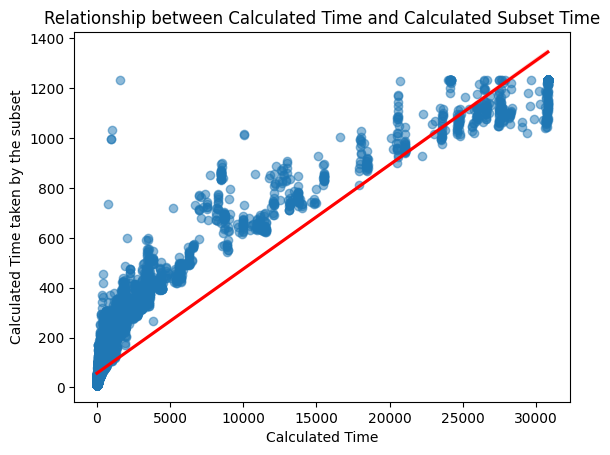

In [50]:
# Regression plot is used as the graph involves two numerical columns
sns.regplot(data=df_final_cleaned,x='osrm_time',y='segment_osrm_time',scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.title('Relationship between Calculated Time and Calculated Subset Time') # Setting Title for the graph
plt.xlabel('Calculated Time') # Setting Name for x-axis
plt.ylabel('Calculated Time taken by the subset') # Setting Name for y-axis

**Interpretation:**
The scatter plot shows a strong positive non-linear relationship between "Calculated Time" and "Calculated Time taken by the subset". The calculated subset time tends to increase as the total calculated time increases, but the relationship is not linear. There are some potential outliers that should be investigated.

# **Hypothesis Testing of OSRM Time vs Segment OSRM Time:**


*    similarly with the actual time vs orsm time, paired t-test is performed and assumptions of paired t-test are checked before performing the test



**Testing Normality of OSRM time and Segment OSRM time**

As the normality test for OSRM time is already performed previously which is not a normal distribution, therefore only checking for the normality of segment OSRM time

**Normality test for Segment OSRM Time using K-S Test**

In [51]:
from scipy.stats import kstest
significance_level=0.05
segment_osrm_time_standardized=(df_final_cleaned['segment_osrm_time'] - df_final_cleaned['segment_osrm_time'].mean())/df_final_cleaned['segment_osrm_time'].std() # segment_osrm_time Standarization
ks_stats_sosrm,ks_pvalue_sosrm=kstest(segment_osrm_time_standardized,'norm') # Testing for segment osrm time standardized
print(f'Test statistic of segment osrm time= {ks_stats_sosrm}')
print(f'P_Value of Segment osrm Time= {ks_pvalue_sosrm}')
if ks_pvalue_sosrm<significance_level:
  print("Conclusion: Distribution is not normal")
else:
  print("Conclusion: Distribution is normal")

Test statistic of segment osrm time= 0.3210761931378182
P_Value of Segment osrm Time= 0.0
Conclusion: Distribution is not normal


**Find Outliers in difference of OSRM Time and Segment OSRM Time using IQR method**

In [52]:
df_osot=df_final_cleaned['osrm_time']-df_final_cleaned['segment_osrm_time']
q1=np.percentile(df_osot,0.25)
q3=np.percentile(df_osot,0.75)
iqr_actual=q3-q1
lower_bound = q1 - (1.5 * iqr) #Lower range
upper_bound = q3 + (1.5 * iqr) #Upper range
outliers = df_osot[(df_osot< lower_bound) | (df_osot> upper_bound)]
Number_of_outliers=len(outliers) # outliers count
print(f"Number of outliers in osrm and segment osrm time is {Number_of_outliers}")

Number of outliers in osrm and segment osrm time is 4099


**Conclusion**: Similar reasons with previous test, Therefore Wilcoxon Signed-Rank Test will be performed

**Hypothesis for Wilcoxon Signed-Rank Test:**

Null Hypothesis: No significant difference between OSRM Time & Segment OSRM Time

Alternative Hypothesis: significant difference between OSRM Time & Segment OSRM Time

Significane level= 5%

**Performing Wilcoxon Signed-Rank Test on OSRM Time vs Segment OSRM Time**

In [53]:
from scipy.stats import wilcoxon # importing wilcoxon
significance_level=0.05
stat_osot,pvalue_osot=wilcoxon(df_final_cleaned['osrm_time'],df_final_cleaned['segment_osrm_time']) # performing Wilcoxon
print(f'Test statistic of OSRM Time and Segment OSRM Time= {stat_osot}') # test statistic value
print(f'P_Value of OSRM Time and Segment OSRM Time= {pvalue_osot}') # p-value
if pvalue_osot<significance_level: # conclusion
  print("Conclusion: Significant difference between OSRM Time and Segment OSRM Time")
else:
  print("Conclusion: No Significant difference between OSRM Time and Segment OSRM Time")

Test statistic of OSRM Time and Segment OSRM Time= 270422.0
P_Value of OSRM Time and Segment OSRM Time= 0.0
Conclusion: Significant difference between OSRM Time and Segment OSRM Time


# **Point a( source_center ) VS Start_scan_to_end_scan**

**Visual Analysis**:


*   **Approach**:
 As source_center has more than rows, the approach is first Grouping data on source_center column and aggregating then extracting the top-50 cities
*   **Plot Selection:**
As the columns involve one numerical and one categorical , Bar Plot is preferred over Boxplot because the data is mean and frequency based, so for the best efficiency bar plot is preferred





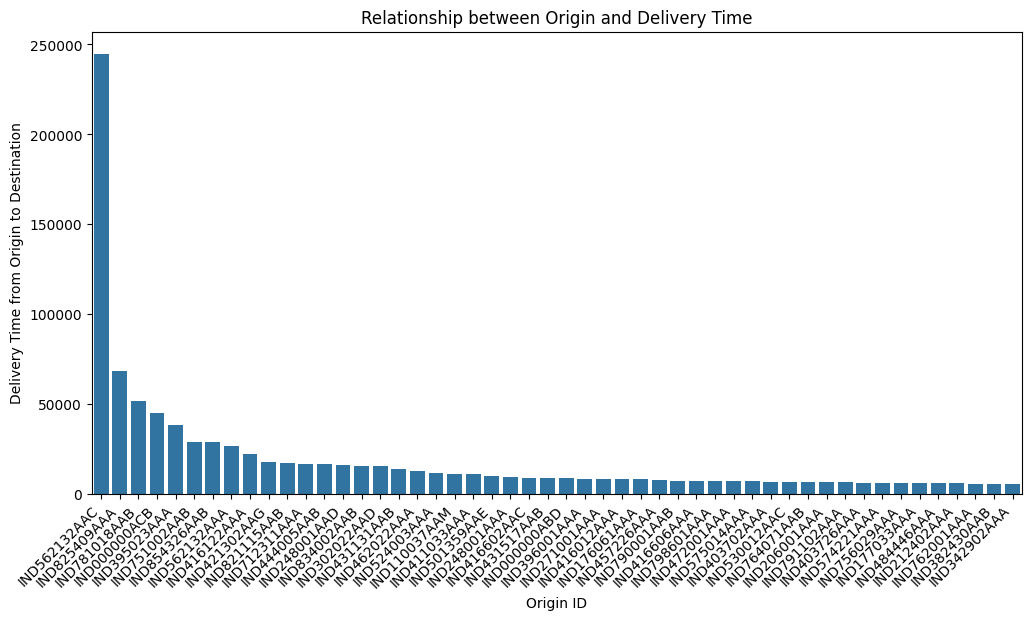

In [ ]:
df_s=round(df_final_cleaned.groupby('source_center')['start_scan_to_end_scan'].mean().reset_index()
           .sort_values(by='start_scan_to_end_scan',ascending=False),0) #Grouping,Aggregation,setting index and sorting in descending order
top_df_s=df_s.head(50) # Top-50 cities on mean basis
plt.figure(figsize=(12,6))
sns.barplot(data=top_df_s,x='source_center',y='start_scan_to_end_scan')
plt.title('Relationship between Origin and Delivery Time')
plt.xlabel('Origin ID')
plt.ylabel('Delivery Time from Origin to Destination')
plt.xticks(rotation=45,ha='right')
plt.show()


**Interpretation:**
 The bar plot reveals that deliveries from one specific origin (IND52132AAC) take significantly longer than deliveries from all other origins. This origin needs to be investigated to understand the reasons for the extended delivery times and to optimize the logistics process. The remaining origins have relatively consistent and shorter delivery times.

# **Hypothesis Test for source center vs start_scan_to_end_scan**


**Conclusion:**

*   As the number of groups for source center are higher we are unable to perform anova test, so the significance impact is proved by the visual representation



*   From the visual representation of bar plot, it's evident that almost all source id groups are approximately having the same delivery time and only 2-3 groups are having higher delivery times. Hence, we conclude that some source groups are significantly effecting the delivery time

**Recommendation:**


1.   Adjust Delivery Estimates Based on City-Wise Trends
2.   Improve Operational Efficiency in High-Delay Cities
3.   Investigate Carrier & Partner Performance







# **Business Insights**

Finding cities with Highest orders

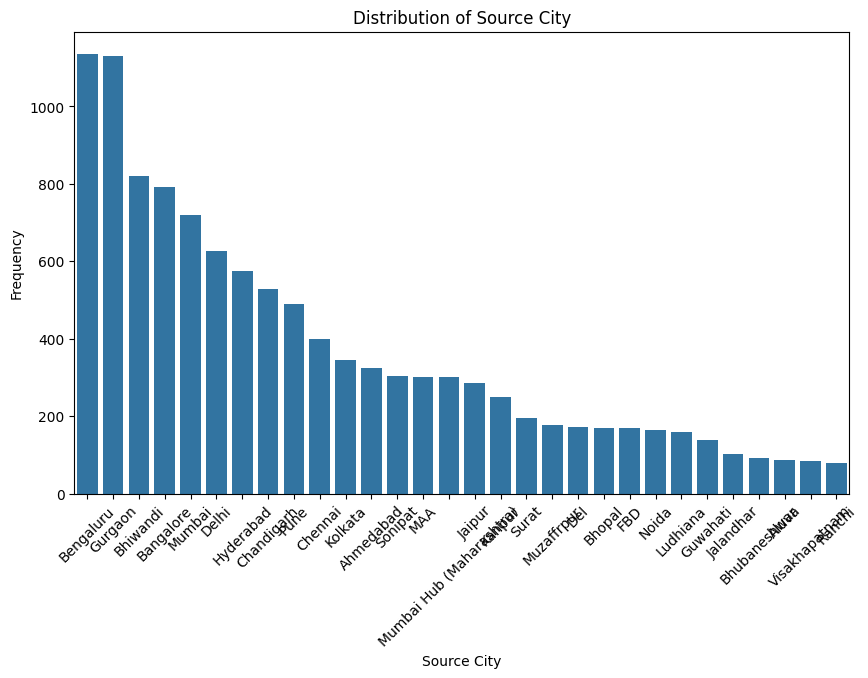

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=df_source_sorted,x='s.city',y='count')
plt.title('Distribution of Source City')
plt.ylabel('Frequency')
plt.xlabel('Source City')
plt.xticks(rotation=45)
plt.show()

**Insight**: From the visualization, it's evident that number of order are more from banglore and gurgaon

Finding the busiest Corridor

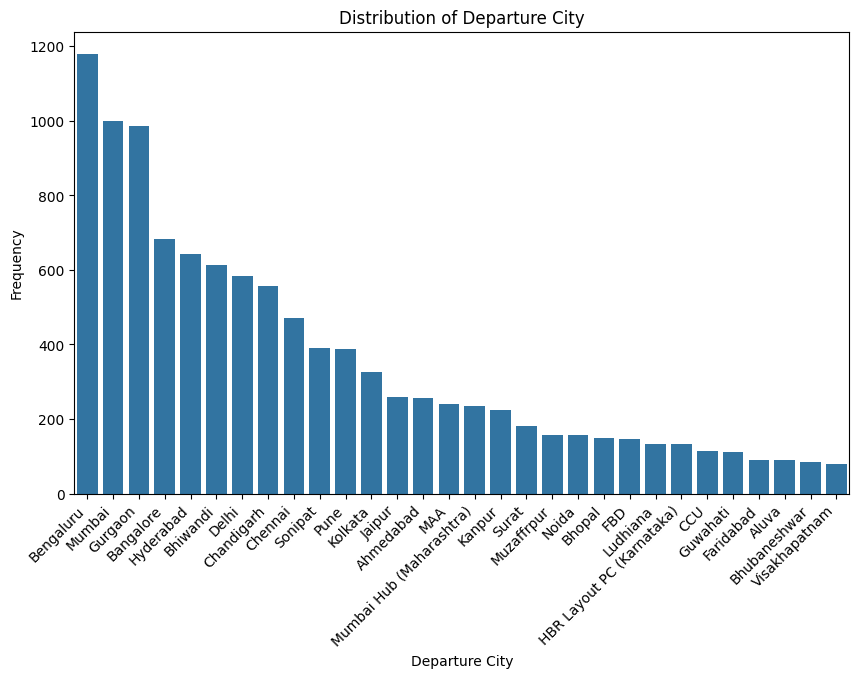

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_departure_sorted,x='d.city',y='count')
plt.title('Distribution of Departure City')
plt.xlabel('Departure City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight**: It's evident that bengaluru, mumbai and gurgaon receiving more deliveries, therefore bengaluru-Gurgaon, bengaluru-mumbai and gurgaon-mumbai are most busiest routes

In [ ]:
df_f1=df_final_cleaned[(df_final_cleaned['s.city']=='Bengaluru') & (df_final_cleaned['d.city']=='Gurgaon')]
df_f2=df_f1[['actual_time','actual_distance_to_destination']].reset_index()
df_f2

,index,actual_time,actual_distance_to_destination
0,21720,116192.0,67869.270949


# **Observation**


**1. Relationship betwen Osrm time and segment osrm time**

In [ ]:
print(f'Test statistic of OSRM Time and Segment OSRM Time= {stat_osot}') # test statistic value
print(f'P_Value of OSRM Time and Segment OSRM Time= {pvalue_osot}') # p-value
if pvalue_osot<significance_level: # conclusion
  print("Conclusion: Significant difference between OSRM Time and Segment OSRM Time")
else:
  print("Conclusion: No Significant difference between OSRM Time and Segment OSRM Time")

Test statistic of OSRM Time and Segment OSRM Time= 246870.5
P_Value of OSRM Time and Segment OSRM Time= 0.0
Conclusion: Significant difference between OSRM Time and Segment OSRM Time


**Calculation and interpretion of effect sizes to understand the magnitude of the differences**

In [56]:
def cohen_d(x, y):
     return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2)

effect_size = cohen_d(df_final_cleaned['actual_time'], df_final_cleaned['segment_osrm_time'])
print(f"Effect size (Cohen's d) between actual_time and segment_osrm_time: {effect_size}")

Effect size (Cohen's d) between actual_time and segment_osrm_time: 0.31297791181689777


Recomendation:

1.   Improve Route Estimation Accuracy
2.   Improve Data Quality & Logging
3.   Investigate Operational Bottlenecks



2. **Relationship between OSRM Distance and Segment OSRM Distance**

In [ ]:
print(f'Test statistic of OSRM Distance and Segment OSRM Distance= {stat_osd}') # test statistic value
print(f'P_Value of OSRM DIstance and Segment OSRM Distance= {pvalue_osd}') # p-value
if pvalue_osd<significance_level: # conclusion
  print("Conclusion: Significant difference between OSRM Distance and Segment OSRM Distance")
else:
  print("Conclusion: No Significant difference between OSRM Distance and Segment OSRM Distance")

Test statistic of OSRM Distance and Segment OSRM Distance= 216995.0
P_Value of OSRM DIstance and Segment OSRM Distance= 0.0
Conclusion: Significant difference between OSRM Distance and Segment OSRM Distance


In [57]:
effect_size = cohen_d(df_final_cleaned['osrm_distance'], df_final_cleaned['segment_osrm_distance'])
print(f"Effect size (Cohen's d) between osrm_distance and segment_osrm_distance: {effect_size}")

Effect size (Cohen's d) between osrm_distance and segment_osrm_distance: 0.2891744056733267


**Recomendation**:


1.    Validate Segment Distance Calculation
2.    Investigate Route Deviations
3.    Improve Data Accuracy & Aggregation



**3. Relationship between Actual Time and Segment Actual Time**

In [ ]:
print(f'Test statistic of actual and segment actual time= {stat_as}') # test statistic value
print(f'P_Value of actual and segment actual time= {pvalue_as}') # p-value
if pvalue_as<significance_level: # conclusion
  print("Conclusion: Significant difference between Actual Time & Segment actual Time")
else:
  print("Conclusion: No Significant difference between Actual Time & Segment actual Time")

Test statistic of actual and segment actual time= 0.0
P_Value of actual and segment actual time= 0.0
Conclusion: Significant difference between Actual Time & Segment actual Time


In [58]:
effect_size = cohen_d(df_final_cleaned['actual_time'], df_final_cleaned['segment_actual_time'])
print(f"Effect size (Cohen's d) between actual_time and segment_actual_time: {effect_size}")

Effect size (Cohen's d) between actual_time and segment_actual_time: 0.2957476733774666


**Recommendation:**

1.    Improve Time Tracking Accuracy
2.    Analyze Route Deviations & Operational Delays



**4. Relationship between Actual Time and ORSM Time**

In [ ]:
print(f'Test statistic of actual and orsm time= {stat_ao}') # finding test statistic value
print(f'P_Value of actual and orsm time= {pvalue_ao}') # finding p_value
if pvalue_ao<significance_level: # finding conclusion
  print("Conclusion: Significant difference between Actual Time & ORSM Time")
else:
  print("Conclusion: No Significant difference between Actual Time & ORSM Time")

Test statistic of actual and orsm time= 1731286.5
P_Value of actual and orsm time= 0.0
Conclusion: Significant difference between Actual Time & ORSM Time


In [59]:
effect_size = cohen_d(df_final_cleaned['actual_time'], df_final_cleaned['osrm_time'])
print(f"Effect size (Cohen's d) between actual_time and osrm_time: {effect_size}")

Effect size (Cohen's d) between actual_time and osrm_time: 0.14605972735069345


**Relationship between time related features**

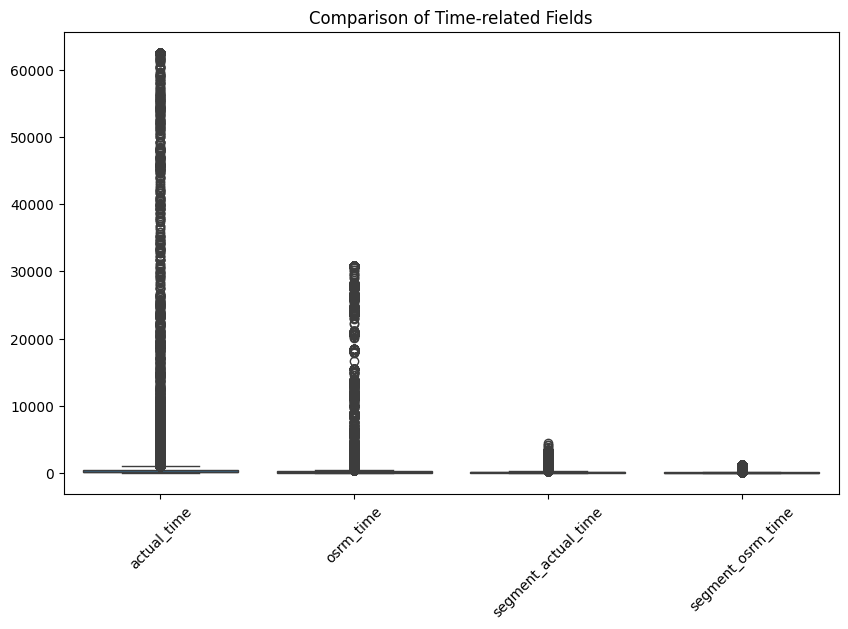

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final_cleaned[['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']])
plt.title('Comparison of Time-related Fields')
plt.xticks(rotation=45)
plt.show()

Calculate and analyze delivery efficiency metrics: ```python df_final_cleaned['delivery_efficiency'] = df_final_cleaned['actual_distance_to_destination'] / df_final_cleaned['actual_time'] efficiency_by_city = df_final_cleaned.groupby('s.city')['delivery_efficiency'].mean().sort_values(ascending=False) print("Top 5 cities by delivery efficiency:") print(efficiency_by_city.head()) ``` - Analyze the impact of route type on delivery times: ```python sns.boxplot(x='route_type', y='actual_time', data=df_final_cleaned) plt.title('Delivery Times by Route Type') plt.show()

**Calculation and analyzing the delivery efficiency metrics**

In [60]:
df_final_cleaned['delivery_efficiency'] = df_final_cleaned['actual_distance_to_destination'] / df_final_cleaned['actual_time']
efficiency_by_city = df_final_cleaned.groupby('s.city')['delivery_efficiency'].mean().sort_values(ascending=False)
print("Top 5 cities by delivery efficiency:")
print(efficiency_by_city.head())

Top 5 cities by delivery efficiency:
s.city
Chikblapur    0.957130
Bassi         0.934598
Jaisalmer     0.932783
Chotila       0.928711
Pokhran       0.907923
Name: delivery_efficiency, dtype: float64


**Analyze the impact of route type on delivery times**

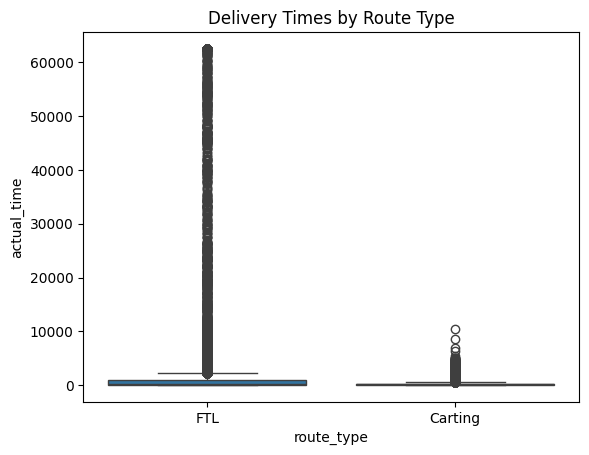

In [61]:
sns.boxplot(x='route_type', y='actual_time', data=df_final_cleaned)
plt.title('Delivery Times by Route Type')
plt.show()

# **Recommendation:**

1.   Investigate Route & Traffic Deviations
2.   Optimize Delivery Operations
3.   Improve OSRM Time Accuracy



In [62]:
time_diff = df_final_cleaned['actual_time'] - df_final_cleaned['osrm_time']
potential_savings = time_diff.mean() * len(df_final_cleaned)
print(f"Potential time savings by improving OSRM accuracy: {potential_savings:.2f} hours")

Potential time savings by improving OSRM accuracy: 25562979.30 hours


In [63]:
recommendations = [ {'name': 'Improve OSRM Accuracy', 'impact': 8, 'feasibility': 7}, {'name': 'Optimize High-Delay Routes', 'impact': 9, 'feasibility': 6}, {'name': 'Enhance Data Quality', 'impact': 7, 'feasibility': 8} ]
df_recommendations = pd.DataFrame(recommendations)
df_recommendations['priority_score'] = df_recommendations['impact'] * df_recommendations['feasibility']
print(df_recommendations.sort_values('priority_score', ascending=False))

                         name  impact  feasibility  priority_score
0       Improve OSRM Accuracy       8            7              56
2        Enhance Data Quality       7            8              56
1  Optimize High-Delay Routes       9            6              54
